# Loading Datasets & Train-Test Split

In this section, we load multiple datasets (classification, regression, and synthetic) using Scikit-Learn's built-in dataset functions. We also split the datasets into training and test sets.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Function to load dataset and perform train-test split
def load_and_split(dataset_loader, *args, **kwargs):
    """Loads dataset, splits into train and test, and returns train-test data."""
    dataset = dataset_loader(*args, **kwargs)
    if hasattr(dataset, "data"):  # Standard datasets with features and targets
        X, y = dataset.data, dataset.target
    else:  # For synthetic datasets that directly return (X, y)
        X, y = dataset

    # Splitting into train (80%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# 1. Classification (Small) Datasets
iris_train = load_and_split(datasets.load_iris)
digits_train = load_and_split(datasets.load_digits)
wine_train = load_and_split(datasets.load_wine)
breast_cancer_train = load_and_split(datasets.load_breast_cancer)

# 2. Regression Datasets
diabetes_train = load_and_split(datasets.load_diabetes)
linnerud_train = load_and_split(datasets.load_linnerud)

# 3. Synthetic Datasets
blobs_train = load_and_split(datasets.make_blobs, n_samples=300, centers=3, random_state=42)
circles_train = load_and_split(datasets.make_circles, n_samples=300, noise=0.05, random_state=42)
moons_train = load_and_split(datasets.make_moons, n_samples=300, noise=0.05, random_state=42)

# 4. Real-world (Larger) Datasets
olivetti_train = load_and_split(datasets.fetch_olivetti_faces, shuffle=True, random_state=42)
california_housing_train = load_and_split(datasets.fetch_california_housing)

# Print dataset shapes as verification
dataset_names = [
    "Iris", "Digits", "Wine", "Breast Cancer",
    "Diabetes", "Linnerud",
    "Blobs", "Circles", "Moons",
    "Olivetti Faces", "California Housing"
]

datasets_list = [
    iris_train, digits_train, wine_train, breast_cancer_train,
    diabetes_train, linnerud_train,
    blobs_train, circles_train, moons_train,
    olivetti_train, california_housing_train
]

for name, (X_train, X_test, y_train, y_test) in zip(dataset_names, datasets_list):
    print(f"{name}: Train shape {X_train.shape}, Test shape {X_test.shape}")

Iris: Train shape (120, 4), Test shape (30, 4)
Digits: Train shape (1437, 64), Test shape (360, 64)
Wine: Train shape (142, 13), Test shape (36, 13)
Breast Cancer: Train shape (455, 30), Test shape (114, 30)
Diabetes: Train shape (353, 10), Test shape (89, 10)
Linnerud: Train shape (16, 3), Test shape (4, 3)
Blobs: Train shape (240, 2), Test shape (60, 2)
Circles: Train shape (240, 2), Test shape (60, 2)
Moons: Train shape (240, 2), Test shape (60, 2)
Olivetti Faces: Train shape (320, 4096), Test shape (80, 4096)
California Housing: Train shape (16512, 8), Test shape (4128, 8)


# Training Classification Models

We train multiple classification models using Scikit-Learn’s classifiers on our datasets. The classifiers include:

Logistic Regression
Decision Tree
Random Forest
AdaBoost
Gradient Boost
SVC (Support Vector Classifier)
Voting Classifier
Stacking Classifier
Naive Bayes (Gaussian)
Each classifier is fitted on the training set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, Pipeline # Import Pipeline
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Function to load dataset and perform train-test split
def load_and_split(dataset_loader, *args, **kwargs):
    dataset = dataset_loader(*args, **kwargs)
    if hasattr(dataset, "data"):
        X, y = dataset.data, dataset.target
    else:
        X, y = dataset
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Datasets
iris_train = load_and_split(datasets.load_iris)
digits_train = load_and_split(datasets.load_digits)
wine_train = load_and_split(datasets.load_wine)
breast_cancer_train = load_and_split(datasets.load_breast_cancer)
olivetti_train = load_and_split(datasets.fetch_olivetti_faces, shuffle=True, random_state=42)

# Synthetic Datasets
blobs_train = load_and_split(datasets.make_blobs, n_samples=300, centers=3, random_state=42)
circles_train = load_and_split(datasets.make_circles, n_samples=300, noise=0.05, random_state=42)
moons_train = load_and_split(datasets.make_moons, n_samples=300, noise=0.05, random_state=42)

# List of classification datasets
classification_datasets = [
    ("Iris", iris_train),
    ("Digits", digits_train),
    ("Wine", wine_train),
    ("Breast Cancer", breast_cancer_train),
    ("Olivetti Faces", olivetti_train),
    ("Blobs", blobs_train),
    ("Circles", circles_train),
    ("Moons", moons_train)
]

# Define classifiers
logistic_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
naive_bayes = GaussianNB()

# Voting Classifier (Combination of multiple models)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic_reg),
        ('dt', decision_tree),
        ('rf', random_forest)
    ],
    voting='soft'
)

# Stacking Classifier (Meta-learning)
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', logistic_reg),
        ('dt', decision_tree),
        ('svc', svc)
    ],
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42)
)

# List of models
models = {
    "Logistic Regression": logistic_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "AdaBoost": adaboost,
    "Gradient Boost": gradient_boost,
    "SVC": svc,
    "Voting Classifier": voting_clf,
    "Stacking Classifier": stacking_clf,
    "Naive Bayes": naive_bayes
}


# Define a basic pipeline structure (you might need to adjust this)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example: Standardize data
    ('classifier', None)  # Placeholder for the actual classifier
])

# Train and print model status
for dataset_name, (X_train, X_test, y_train, y_test) in classification_datasets:
    print(f"\n--- Training Models on {dataset_name} Dataset ---")

    for model_name, model in models.items():
        # Set the classifier in the pipeline
        pipeline.set_params(classifier=model)

        pipeline.fit(X_train, y_train) # Fit using pipeline to include scaler
        print(f"{model_name} trained successfully.")


--- Training Models on Iris Dataset ---
Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
AdaBoost trained successfully.
Gradient Boost trained successfully.
SVC trained successfully.
Voting Classifier trained successfully.
Stacking Classifier trained successfully.
Naive Bayes trained successfully.

--- Training Models on Digits Dataset ---
Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
AdaBoost trained successfully.
Gradient Boost trained successfully.
SVC trained successfully.
Voting Classifier trained successfully.
Stacking Classifier trained successfully.
Naive Bayes trained successfully.

--- Training Models on Wine Dataset ---
Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
AdaBoost trained successfully.
Gradient Boost trained successfully.
SVC trained successfully.
Voting Classifier t

# Classification Metrics

We evaluate our classification models using standard performance metrics:

Accuracy: Overall correctness of the model

Precision: Ability to avoid false positives

Recall: Ability to find all positive instances

F1-score: Harmonic mean of precision & recall

AUC score: Measures model performance in distinguishing classes

PR Curve & ROC Curve: Visualization of performance

These metrics are computed for each classifier.


### Evaluating Models on Iris ###

--- Iris | Pipeline ---
Accuracy: 0.3667
Precision: 0.2017
Recall: 0.3667
F1-score: 0.2602
AUC Score: 0.8571

--- Iris | DecisionTreeClassifier ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Iris | RandomForestClassifier ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.6917


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Iris | AdaBoostClassifier ---
Accuracy: 0.3667
Precision: 0.2017
Recall: 0.3667
F1-score: 0.2602
AUC Score: 0.6917


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Iris | GradientBoostingClassifier ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.3083

--- Iris | Pipeline ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.1497


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Iris | VotingClassifier ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.8571


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Iris | StackingClassifier ---
Accuracy: 0.3667
Precision: 0.1921
Recall: 0.3667
F1-score: 0.2521
AUC Score: 0.6751

--- Iris | GaussianNB ---
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1-score: 0.1967
AUC Score: 0.7703

### Evaluating Models on Digits ###

--- Digits | Pipeline ---
Accuracy: 0.8139
Precision: 0.8967
Recall: 0.8139
F1-score: 0.8113
AUC Score: 0.9946

--- Digits | DecisionTreeClassifier ---
Accuracy: 0.2250
Precision: 0.1930
Recall: 0.2250
F1-score: 0.1597
AUC Score: 0.5719


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Digits | RandomForestClassifier ---
Accuracy: 0.2778
Precision: 0.5019
Recall: 0.2778
F1-score: 0.2421
AUC Score: 0.9276


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Digits | AdaBoostClassifier ---
Accuracy: 0.1111
Precision: 0.0695
Recall: 0.1111
F1-score: 0.0609
AUC Score: 0.8719


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Digits | GradientBoostingClassifier ---
Accuracy: 0.2778
Precision: 0.5305
Recall: 0.2778
F1-score: 0.2780
AUC Score: 0.8518


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Digits | Pipeline ---
Accuracy: 0.1278
Precision: 0.0163
Recall: 0.1278
F1-score: 0.0290
AUC Score: 0.5015

--- Digits | VotingClassifier ---
Accuracy: 0.5056
Precision: 0.7403
Recall: 0.5056
F1-score: 0.5092
AUC Score: 0.9689


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


--- Digits | StackingClassifier ---
Accuracy: 0.5500
Precision: 0.6000
Recall: 0.5500
F1-score: 0.5163
AUC Score: 0.9175

--- Digits | GaussianNB ---
Accuracy: 0.1167
Precision: 0.1402
Recall: 0.1167
F1-score: 0.0330
AUC Score: 0.5032

### Evaluating Models on Wine ###

--- Wine | Pipeline ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5476

--- Wine | DecisionTreeClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Wine | RandomForestClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.3152


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Wine | AdaBoostClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Wine | GradientBoostingClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.4596

--- Wine | Pipeline ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5000

--- Wine | VotingClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.3152


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Wine | StackingClassifier ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5000

--- Wine | GaussianNB ---
Accuracy: 0.3889
Precision: 0.1512
Recall: 0.3889
F1-score: 0.2178
AUC Score: 0.5000

### Evaluating Models on Breast Cancer ###

--- Breast Cancer | Pipeline ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.6268


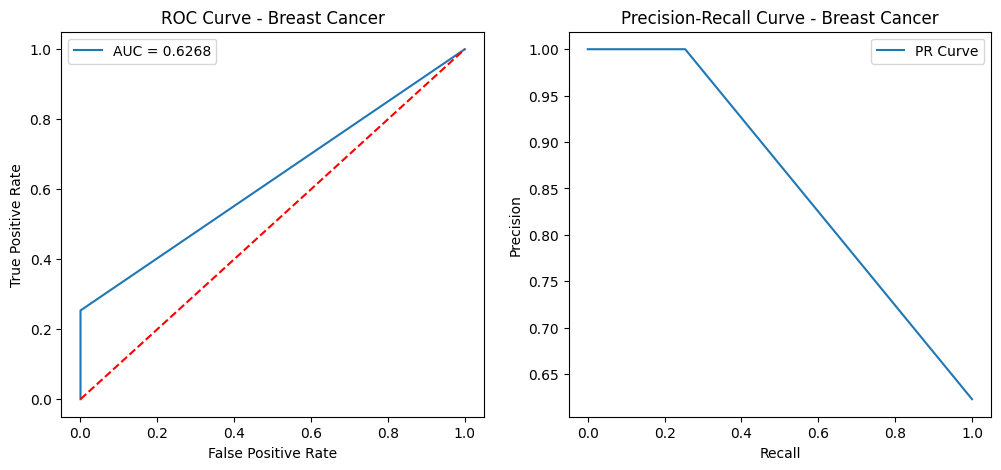


--- Breast Cancer | DecisionTreeClassifier ---
Accuracy: 0.8596
Precision: 0.8855
Recall: 0.8596
F1-score: 0.8507
AUC Score: 0.8140


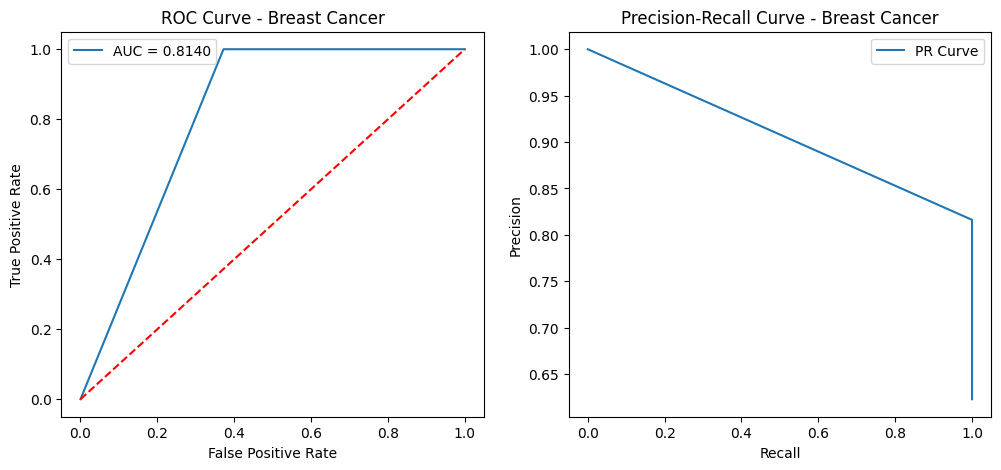

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | RandomForestClassifier ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.9052


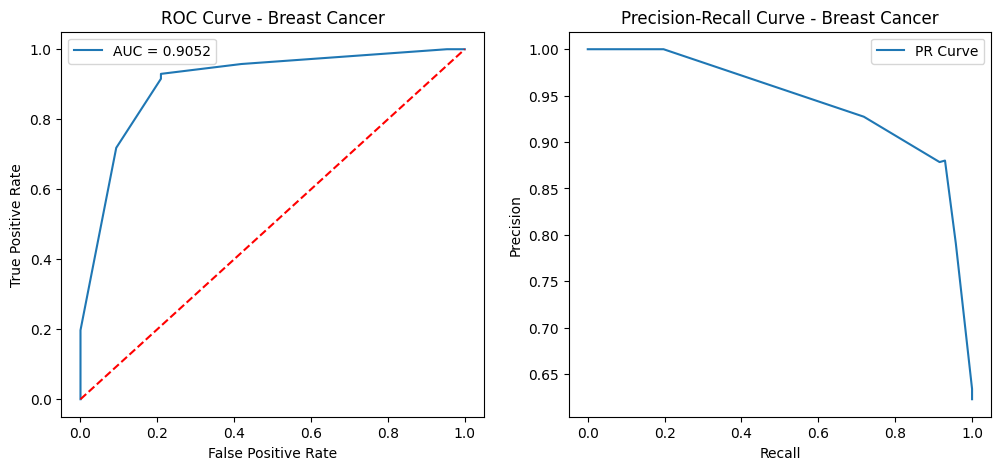

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | AdaBoostClassifier ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.8457


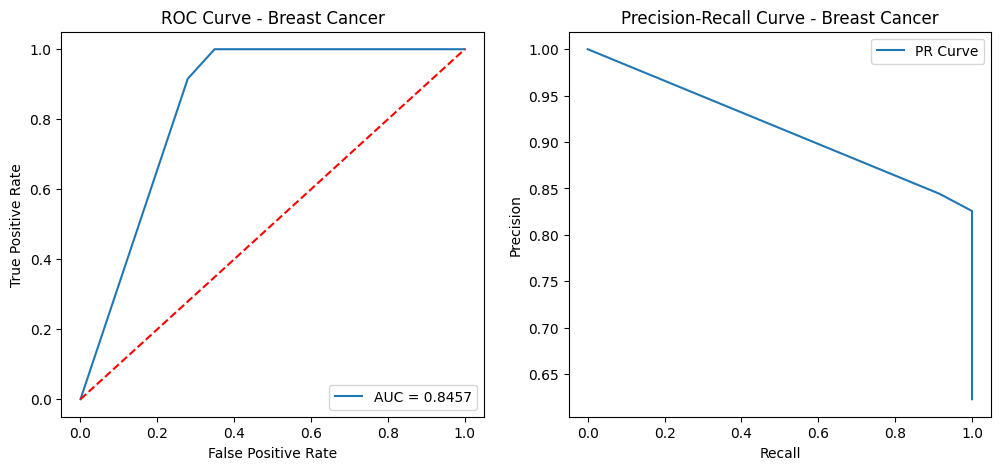

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | GradientBoostingClassifier ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.8009


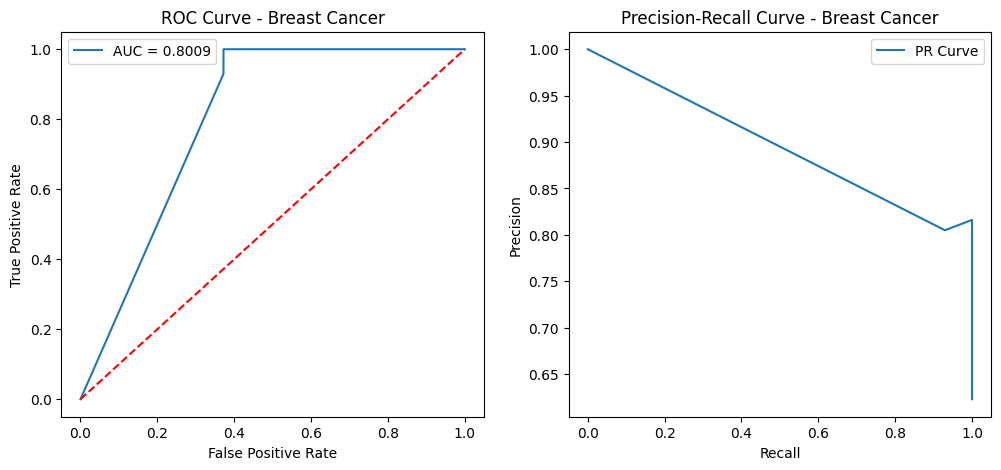

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | Pipeline ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.5000


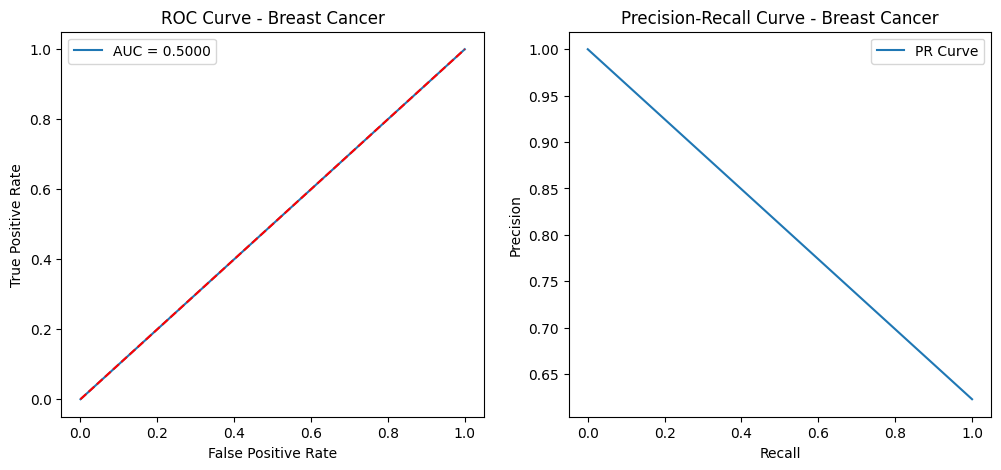

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | VotingClassifier ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.9224


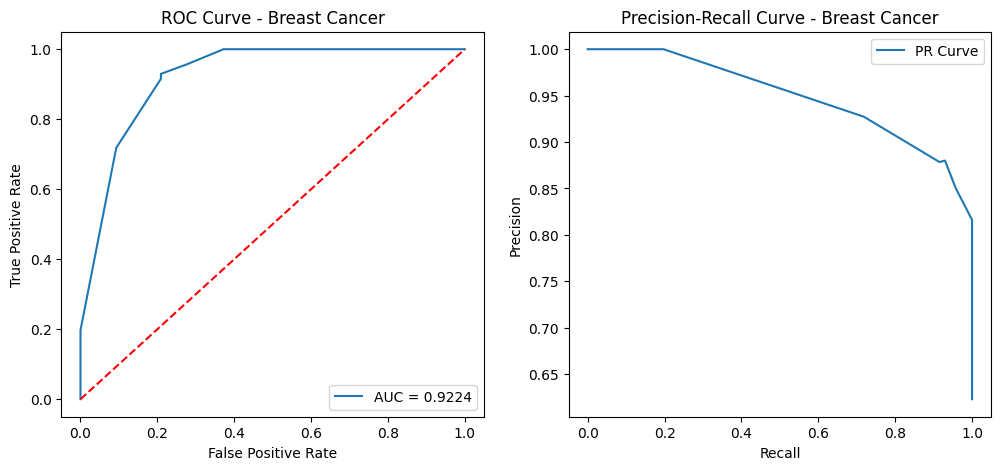

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | StackingClassifier ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.8140


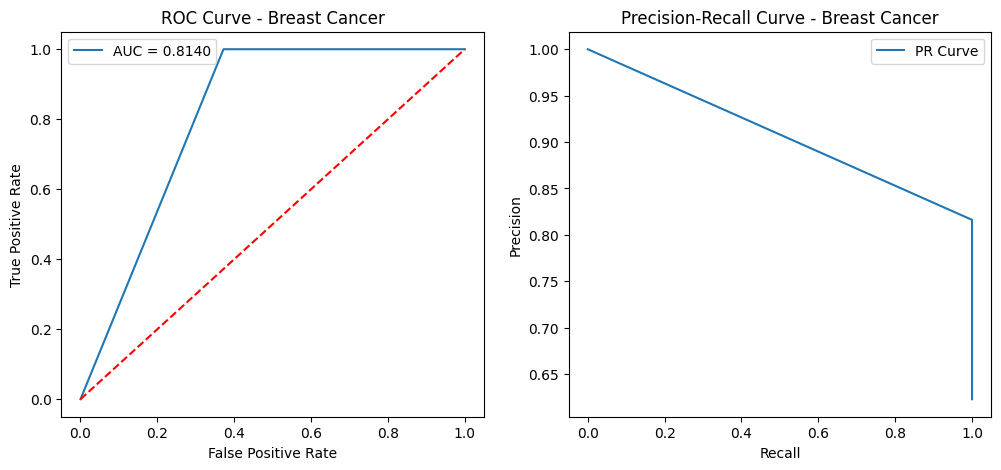

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Breast Cancer | GaussianNB ---
Accuracy: 0.3772
Precision: 0.1423
Recall: 0.3772
F1-score: 0.2066
AUC Score: 0.5000


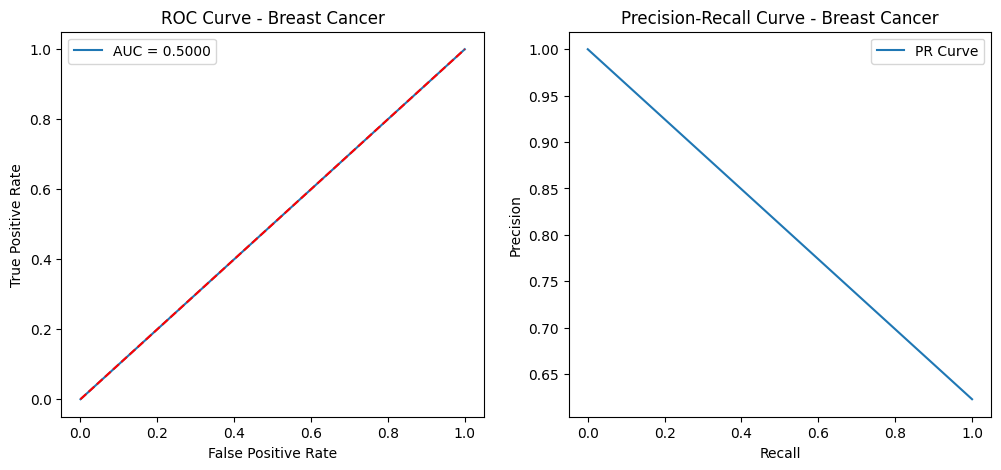


### Evaluating Models on Olivetti Faces ###


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | Pipeline ---
Accuracy: 0.0250
Precision: 0.0006
Recall: 0.0250
F1-score: 0.0012
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | DecisionTreeClassifier ---
Accuracy: 0.0625
Precision: 0.0040
Recall: 0.0625
F1-score: 0.0075
AUC Score: 0.4998


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | RandomForestClassifier ---
Accuracy: 0.0375
Precision: 0.0015
Recall: 0.0375
F1-score: 0.0029
AUC Score: 0.4996


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | AdaBoostClassifier ---
Accuracy: 0.0250
Precision: 0.0006
Recall: 0.0250
F1-score: 0.0012
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | GradientBoostingClassifier ---
Accuracy: 0.0500
Precision: 0.0025
Recall: 0.0500
F1-score: 0.0048
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | Pipeline ---
Accuracy: 0.0625
Precision: 0.0228
Recall: 0.0625
F1-score: 0.0290
AUC Score: 0.5204


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | VotingClassifier ---
Accuracy: 0.0625
Precision: 0.0040
Recall: 0.0625
F1-score: 0.0075
AUC Score: 0.4998


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Olivetti Faces | StackingClassifier ---
Accuracy: 0.0750
Precision: 0.0076
Recall: 0.0750
F1-score: 0.0134
AUC Score: 0.5120

--- Olivetti Faces | GaussianNB ---
Accuracy: 0.0750
Precision: 0.0328
Recall: 0.0750
F1-score: 0.0363
AUC Score: 0.5126

### Evaluating Models on Blobs ###

--- Blobs | Pipeline ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | DecisionTreeClassifier ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | RandomForestClassifier ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | AdaBoostClassifier ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | GradientBoostingClassifier ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | Pipeline ---
Accuracy: 0.2833
Precision: 0.0803
Recall: 0.2833
F1-score: 0.1251
AUC Scor

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Blobs | StackingClassifier ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

--- Blobs | GaussianNB ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC Score: 1.0000

### Evaluating Models on Circles ###

--- Circles | Pipeline ---
Accuracy: 0.4333
Precision: 0.1878
Recall: 0.4333
F1-score: 0.2620
AUC Score: 0.5124


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


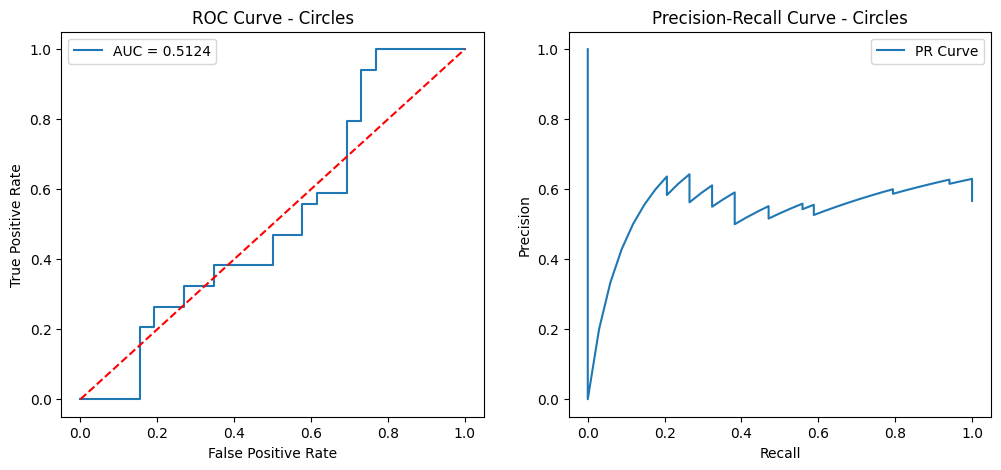


--- Circles | DecisionTreeClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


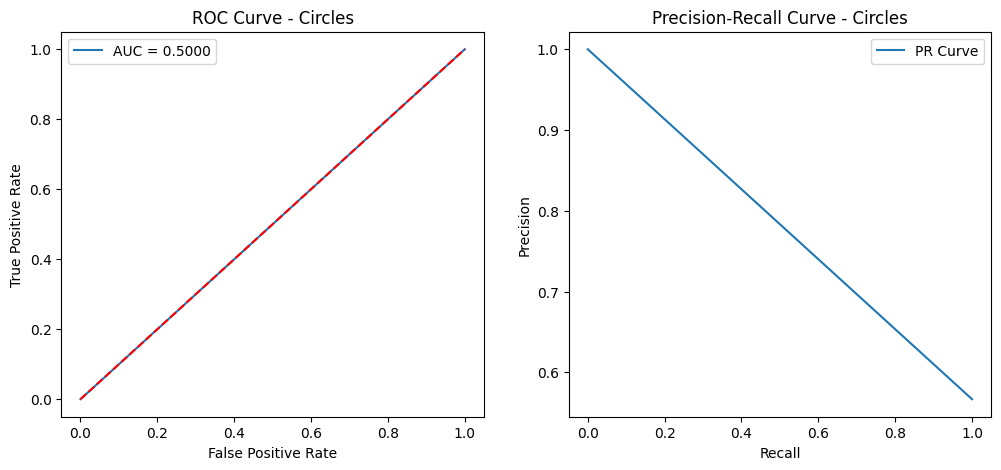


--- Circles | RandomForestClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.6748


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


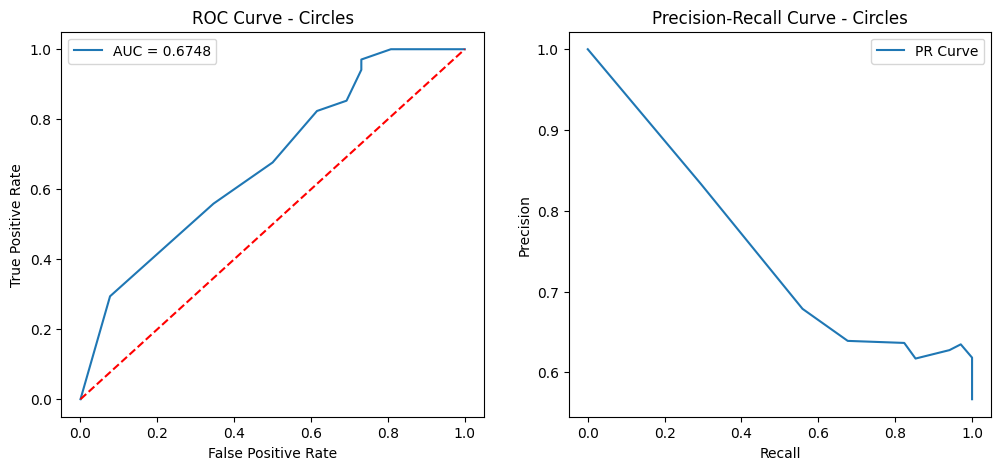

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Circles | AdaBoostClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.8213


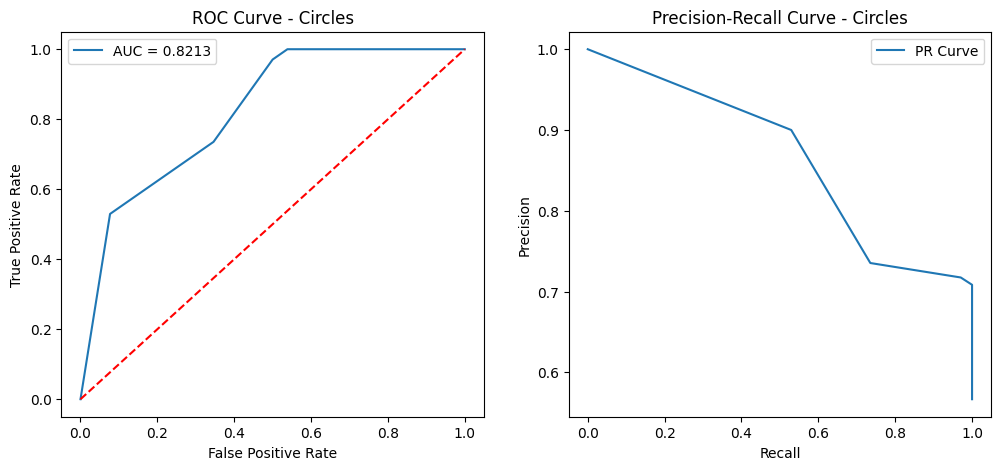


--- Circles | GradientBoostingClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.8937


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


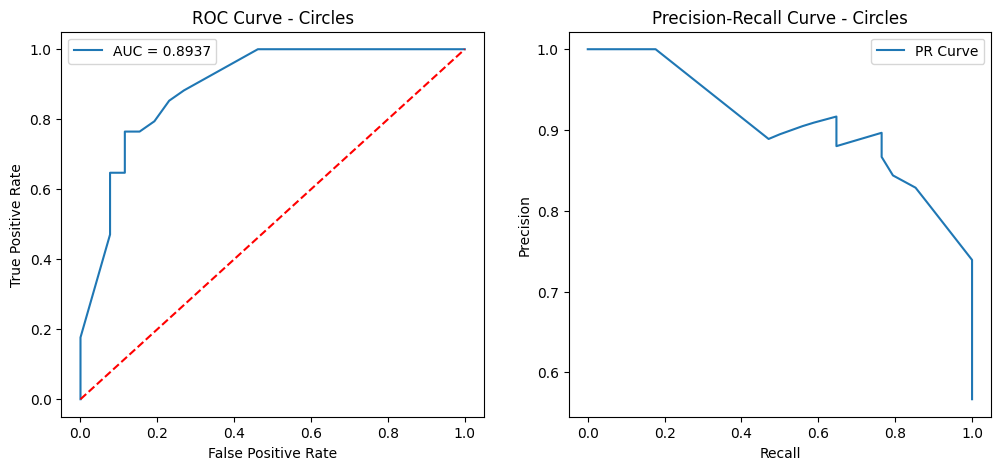

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Circles | Pipeline ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.9548


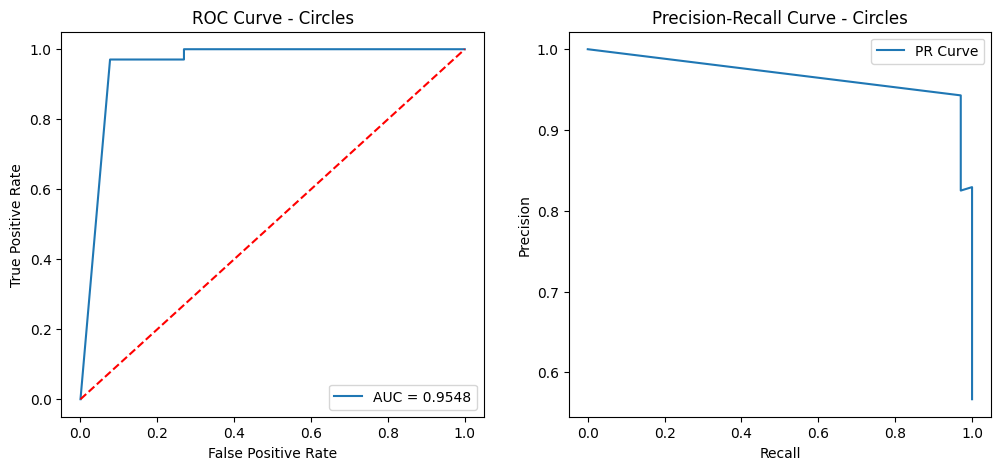

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Circles | VotingClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.6719


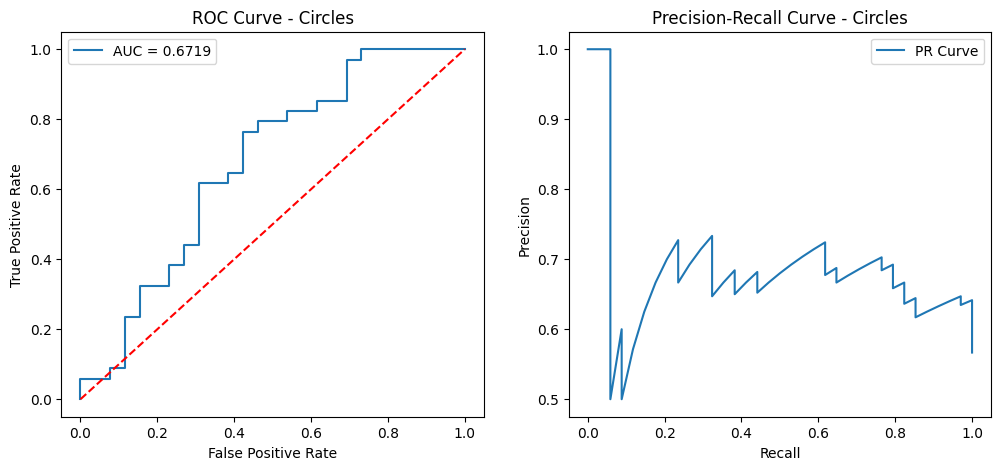


--- Circles | StackingClassifier ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.5181


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


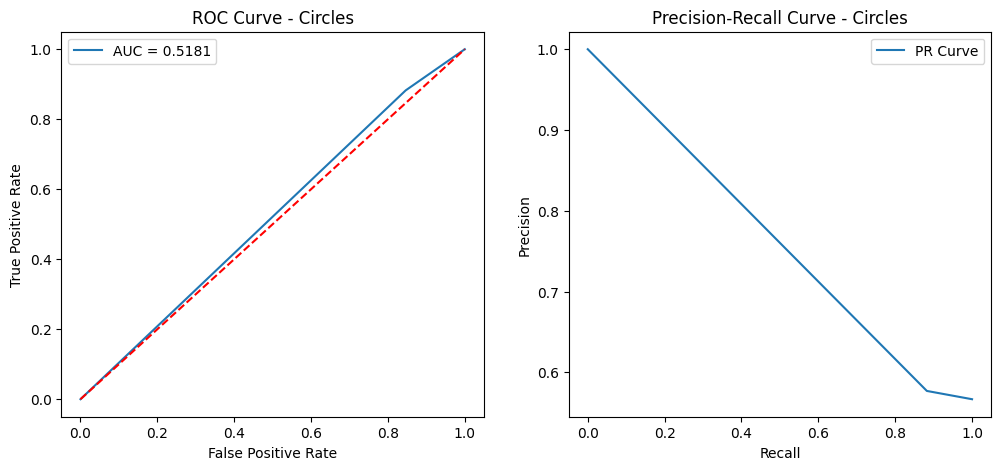

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Circles | GaussianNB ---
Accuracy: 0.5667
Precision: 0.3211
Recall: 0.5667
F1-score: 0.4099
AUC Score: 0.9525


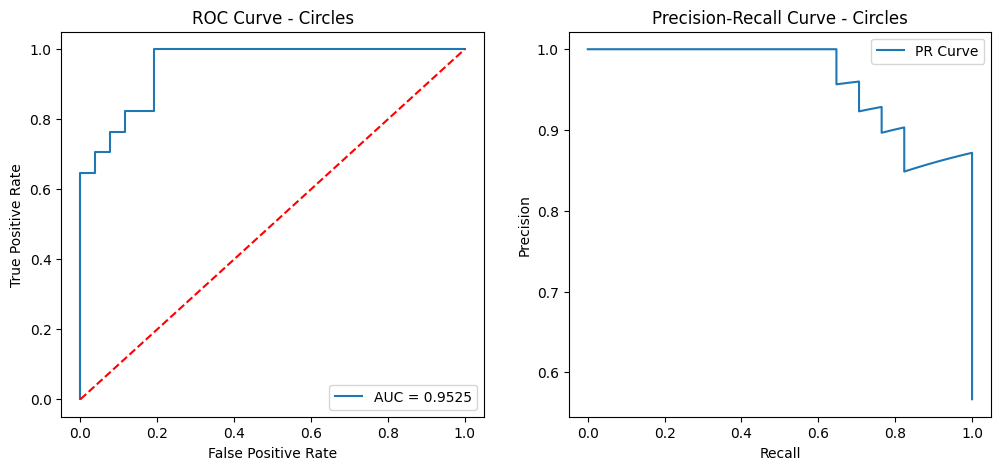


### Evaluating Models on Moons ###

--- Moons | Pipeline ---
Accuracy: 0.9667
Precision: 0.9667
Recall: 0.9667
F1-score: 0.9667
AUC Score: 0.9887


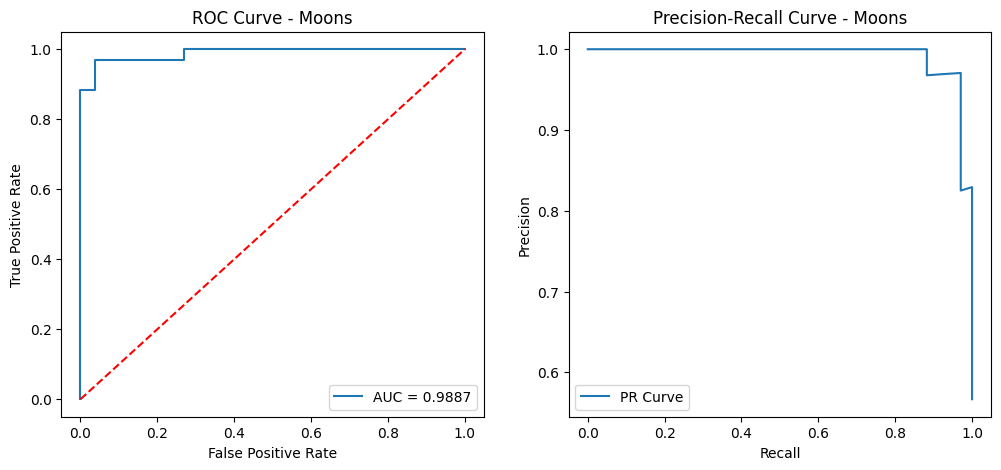


--- Moons | DecisionTreeClassifier ---
Accuracy: 0.6833
Precision: 0.7413
Recall: 0.6833
F1-score: 0.6776
AUC Score: 0.7070


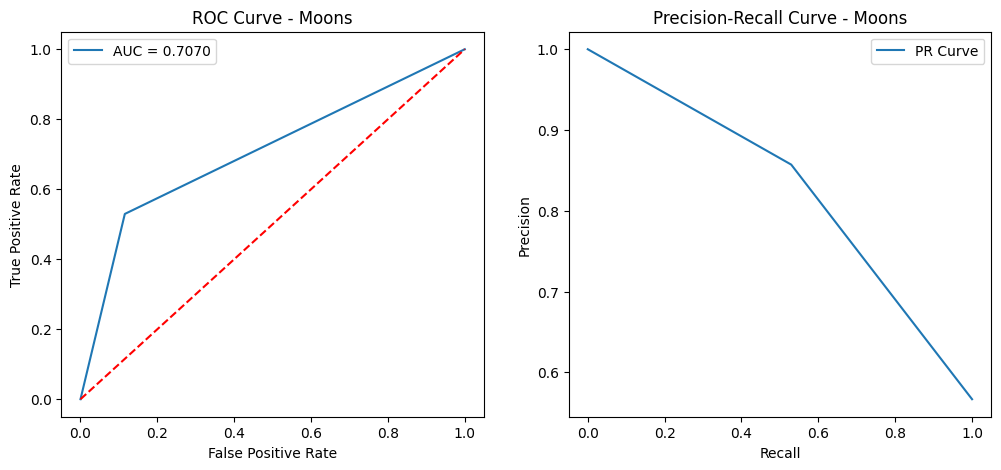


--- Moons | RandomForestClassifier ---
Accuracy: 0.7500
Precision: 0.7985
Recall: 0.7500
F1-score: 0.7477
AUC Score: 0.8445


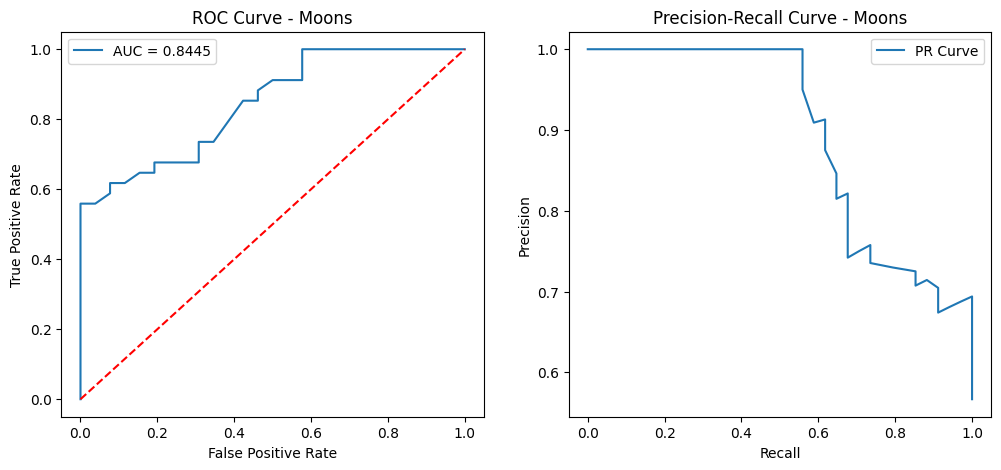


--- Moons | AdaBoostClassifier ---
Accuracy: 0.7500
Precision: 0.7625
Recall: 0.7500
F1-score: 0.7510
AUC Score: 0.8173


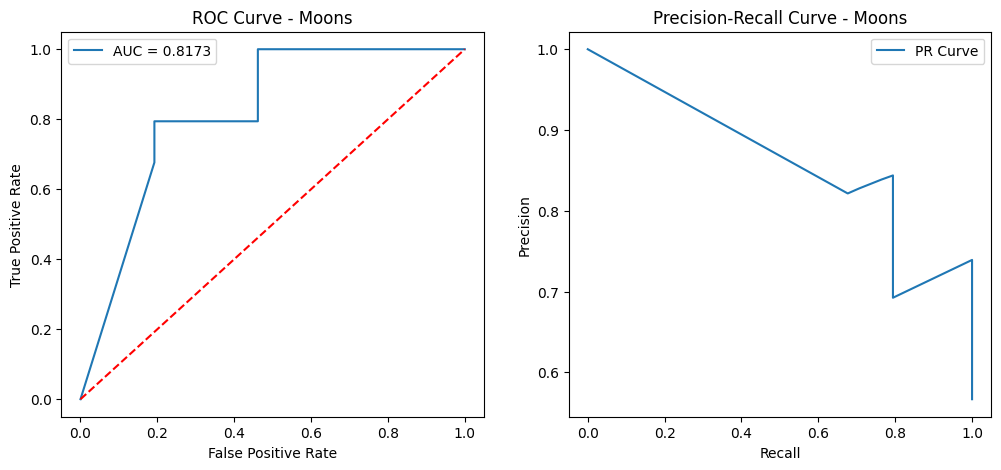


--- Moons | GradientBoostingClassifier ---
Accuracy: 0.6667
Precision: 0.7308
Recall: 0.6667
F1-score: 0.6588
AUC Score: 0.8914


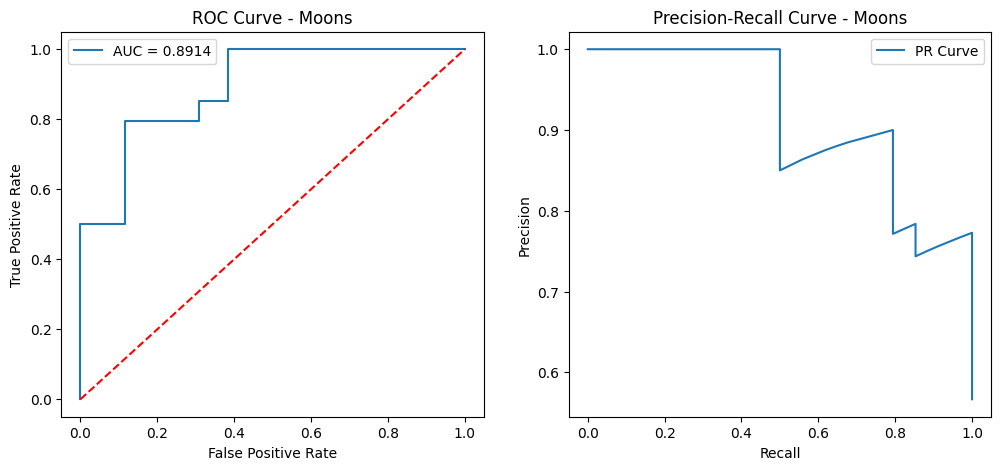


--- Moons | Pipeline ---
Accuracy: 0.6000
Precision: 0.6402
Recall: 0.6000
F1-score: 0.5946
AUC Score: 0.7319


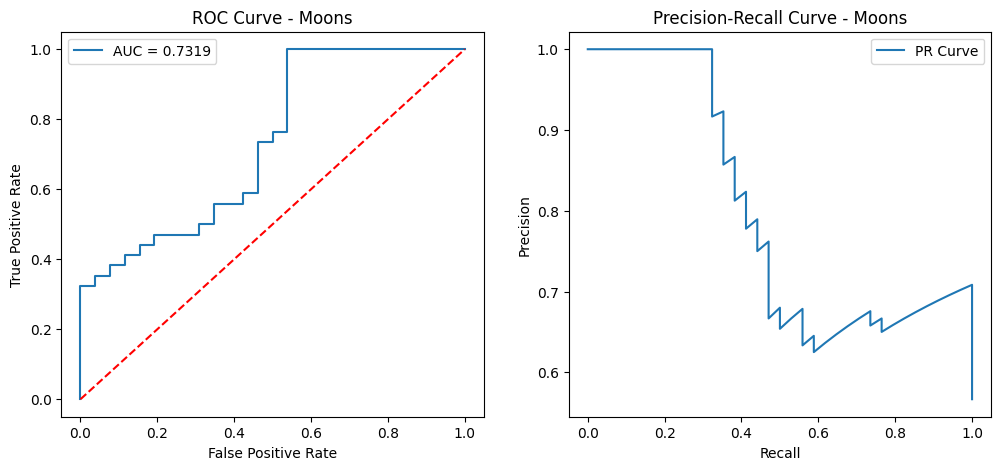


--- Moons | VotingClassifier ---
Accuracy: 0.7000
Precision: 0.7517
Recall: 0.7000
F1-score: 0.6960
AUC Score: 0.9174


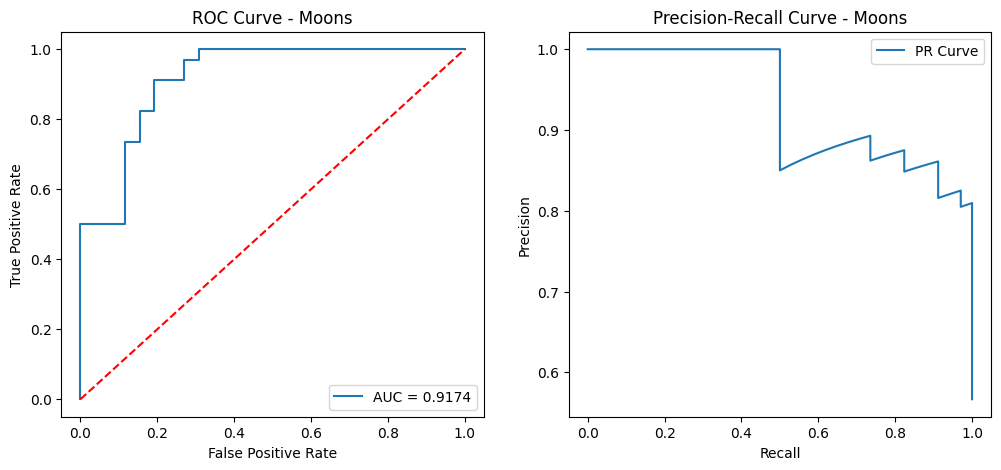


--- Moons | StackingClassifier ---
Accuracy: 0.6000
Precision: 0.6402
Recall: 0.6000
F1-score: 0.5946
AUC Score: 0.7590


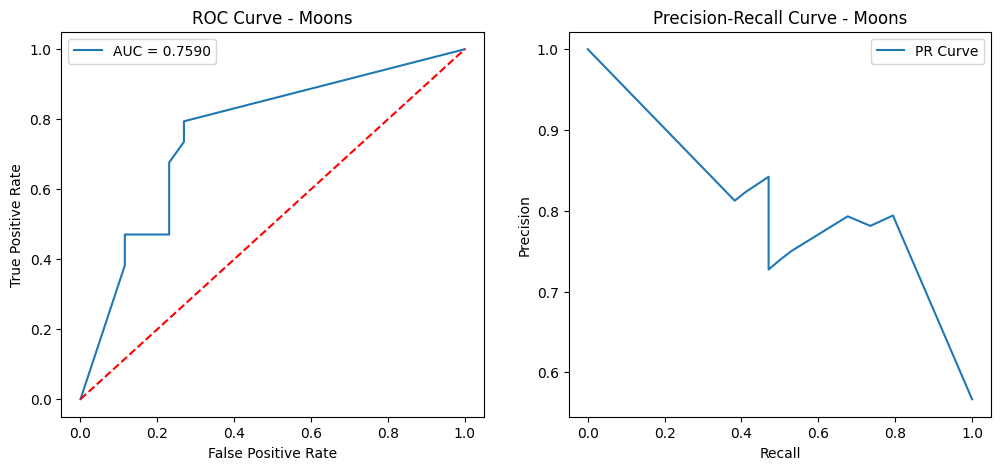


--- Moons | GaussianNB ---
Accuracy: 0.9667
Precision: 0.9667
Recall: 0.9667
F1-score: 0.9667
AUC Score: 0.9898


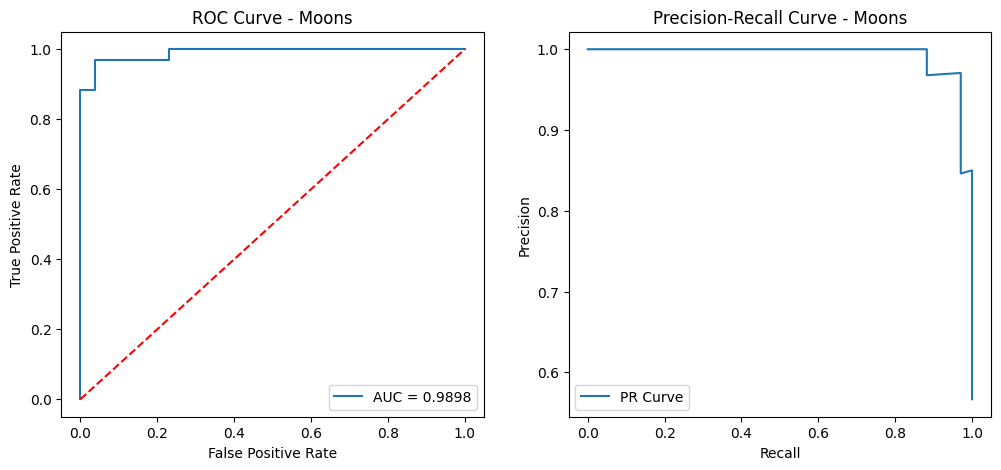

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Function to evaluate models and print metrics
def evaluate_model(model, X_test, y_test, dataset_name):

    # Get predicted labels first
    y_pred = model.predict(X_test)

    # If model supports probability estimates, get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)
    else:  # For models like DecisionTree that do not support predict_proba
        # Create a one-hot encoded representation of predictions
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1  # Set probability to 1 for predicted class

    # Accuracy, Precision, Recall, F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # AUC Score (only if applicable)
    if len(np.unique(y_test)) == 2:  # Binary Classification
        auc_score = roc_auc_score(y_test, y_scores[:, 1])
    else:  # Multiclass
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

        # Ensure y_scores has the correct number of columns
        num_classes = y_test_binarized.shape[1]
        if y_scores.shape[1] != num_classes:
            y_scores = np.zeros((len(y_test), num_classes))
            for i, pred in enumerate(y_pred):
                y_scores[i, pred] = 1  # Set probability to 1 for predicted class

        auc_score = roc_auc_score(y_test_binarized, y_scores, average="weighted", multi_class="ovr")

    print(f"\n--- {dataset_name} | {model.__class__.__name__} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

    # Plot PR and ROC Curves (Only for Binary Classification)
    if len(np.unique(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_scores[:, 1])

        plt.figure(figsize=(12, 5))

        # ROC Curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {dataset_name}")
        plt.legend()

        # PR Curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_vals, precision_vals, label="PR Curve")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Precision-Recall Curve - {dataset_name}")
        plt.legend()

        plt.show()

for dataset_name, (X_train, X_test, y_train, y_test) in classification_datasets:
    print(f"\n### Evaluating Models on {dataset_name} ###")
    for model_name, model in models.items():
        # Create a new pipeline instance for each model and dataset
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Example: Standardize data
            ('classifier', model)  # Placeholder for the actual classifier
        ])
        # Call predict on the pipeline, not the final estimator
        # This ensures the pipeline steps (including PCA) are applied
        # before prediction.
        #pipeline.set_params(classifier=model) # Ensure the correct model in the pipeline

        # Fit the pipeline to the current dataset's training data
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        evaluate_model(model, X_test, y_test, dataset_name)

# Training Regression Models

We train multiple regression models using Scikit-Learn’s regressors. The models include:

Linear Regression
Decision Tree Regression
Random Forest Regression
AdaBoost Regression
Gradient Boost Regression
Support Vector Regression (SVR)
Voting Regression
Stacking Regression
Each regressor is fitted on the training set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Regression Datasets
diabetes_train = load_and_split(datasets.load_diabetes)
linnerud_train = load_and_split(datasets.load_linnerud)
california_housing_train = load_and_split(datasets.fetch_california_housing)

# List of regression datasets
regression_datasets = [
    ("Diabetes", diabetes_train),
    #("Linnerud", linnerud_train), dropped as advised
    ("California Housing", california_housing_train)
]

# Define regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
adaboost_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
gradient_boost_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = make_pipeline(StandardScaler(), SVR())

# Voting Regressor (Combination of multiple models)
voting_reg = VotingRegressor(
    estimators=[
        ('lr', linear_reg),
        ('dt', decision_tree_reg),
        ('rf', random_forest_reg)
    ]
)

# Stacking Regressor (Meta-learning)
stacking_reg = StackingRegressor(
    estimators=[
        ('lr', linear_reg),
        ('dt', decision_tree_reg),
        ('svr', svr)
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, random_state=42)
)

# List of models
regression_models = {
    "Linear Regression": linear_reg,
    "Decision Tree Regression": decision_tree_reg,
    "Random Forest Regression": random_forest_reg,
    "AdaBoost Regression": adaboost_reg,
    "Gradient Boost Regression": gradient_boost_reg,
    "SVR": svr,
    "Voting Regression": voting_reg,
    "Stacking Regression": stacking_reg
}

# Train and print model status
for dataset_name, (X_train, X_test, y_train, y_test) in regression_datasets:
    print(f"\n--- Training Models on {dataset_name} Dataset ---")

    for model_name, model in regression_models.items():
        # Reshape y_train to be 1D if it has multiple targets
        if y_train.ndim > 1 and y_train.shape[1] > 1:  # Check if multi-target
            y_train = y_train.ravel()  # Flatten to 1D

        model.fit(X_train, y_train)
        print(f"{model_name} trained successfully.")



--- Training Models on Diabetes Dataset ---
Linear Regression trained successfully.
Decision Tree Regression trained successfully.
Random Forest Regression trained successfully.
AdaBoost Regression trained successfully.
Gradient Boost Regression trained successfully.
SVR trained successfully.
Voting Regression trained successfully.
Stacking Regression trained successfully.

--- Training Models on California Housing Dataset ---
Linear Regression trained successfully.
Decision Tree Regression trained successfully.
Random Forest Regression trained successfully.
AdaBoost Regression trained successfully.
Gradient Boost Regression trained successfully.
SVR trained successfully.
Voting Regression trained successfully.
Stacking Regression trained successfully.


# Regression Metrics

We evaluate regression models using standard performance metrics:

Root Mean Squared Error (RMSE): Measures prediction error

R² Score: Measures how well the model explains variance in the data

These metrics are computed for each regressor.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate models
def evaluate_regressor(model, X_test, y_test, dataset_name):
    y_pred = model.predict(X_test)

    # Calculate RMSE and R²-score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {dataset_name} | {model.__class__.__name__} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²-score: {r2:.4f}")

# Evaluate models on each regression dataset
for dataset_name, (X_train, X_test, y_train, y_test) in regression_datasets:
    print(f"\n### Evaluating Models on {dataset_name} ###")

    for model_name, model in regression_models.items():
        # Check if the model has been trained before
        # If not, train it again using the current dataset's training data
        if not hasattr(model, 'n_features_in_') or model.n_features_in_ != X_train.shape[1]:
            model.fit(X_train, y_train)

        evaluate_regressor(model, X_test, y_test, dataset_name)



### Evaluating Models on Diabetes ###

--- Diabetes | LinearRegression ---
RMSE: 53.8534
R²-score: 0.4526

--- Diabetes | DecisionTreeRegressor ---
RMSE: 70.5464
R²-score: 0.0607

--- Diabetes | RandomForestRegressor ---
RMSE: 54.3324
R²-score: 0.4428

--- Diabetes | AdaBoostRegressor ---
RMSE: 56.1353
R²-score: 0.4052

--- Diabetes | GradientBoostingRegressor ---
RMSE: 53.8371
R²-score: 0.4529

--- Diabetes | Pipeline ---
RMSE: 65.8235
R²-score: 0.1822

--- Diabetes | VotingRegressor ---
RMSE: 54.3528
R²-score: 0.4424

--- Diabetes | StackingRegressor ---
RMSE: 55.8653
R²-score: 0.4109

### Evaluating Models on California Housing ###

--- California Housing | LinearRegression ---
RMSE: 0.7456
R²-score: 0.5758

--- California Housing | DecisionTreeRegressor ---
RMSE: 0.7037
R²-score: 0.6221

--- California Housing | RandomForestRegressor ---
RMSE: 0.5053
R²-score: 0.8051

--- California Housing | AdaBoostRegressor ---
RMSE: 0.7839
R²-score: 0.5311

--- California Housing | GradientBoo

# Handling Class Imbalance

Class imbalance can significantly impact model performance.

Synthetic Data Generation: We create an imbalanced binary dataset (10:1 class ratio) using make_classification()

Training a Decision Tree: We train a decision tree with and without class_weight=balanced.

Compare Performance: We evaluate classification metrics with and without class balancing.

Observations: The balanced model improves recall for the minority class.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

# (6.1) Create imbalanced dataset (10:1 ratio)
X, y = make_classification(n_samples=5000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# (6.2) Train Decision Tree Classifier without class weight
dt_without_weight = DecisionTreeClassifier(random_state=42, class_weight=None)
dt_without_weight.fit(X_train, y_train)

# (6.2) Train Decision Tree Classifier with class weight = "balanced"
dt_with_weight = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt_with_weight.fit(X_train, y_train)

# Function to compute metrics
def evaluate_classifier(model, X_test, y_test, description):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # For AUC score

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_probs)

    print(f"\n--- {description} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

# (6.3) Compute metrics without class weight
evaluate_classifier(dt_without_weight, X_test, y_test, "Decision Tree (Without Class Weight)")

# (6.4) Compute metrics with class weight
evaluate_classifier(dt_with_weight, X_test, y_test, "Decision Tree (With Class Weight = Balanced)")



--- Decision Tree (Without Class Weight) ---
Accuracy: 0.9290
Precision: 0.6635
Recall: 0.6571
F1-score: 0.6603
AUC Score: 0.8090

--- Decision Tree (With Class Weight = Balanced) ---
Accuracy: 0.9300
Precision: 0.6733
Recall: 0.6476
F1-score: 0.6602
AUC Score: 0.8054


# Handling Missing Values in Classification

We introduce 10% missing values in a classification dataset and handle them using different imputation strategies:

Constant Imputation (Filling missing values with a fixed value)

Mean Imputation (Replacing missing values with feature mean)

Mode Imputation (Replacing missing values for categorical data)

Machine Learning-Based Imputation

Each approach is evaluated based on classification metrics.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# (7.1) Load dataset and introduce 10% missing values manually
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Introduce missing values (10% randomly)
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.1  # 10% missing
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_missing, y, test_size=0.2, random_state=42)

# Define a function to evaluate classifiers
def evaluate_model(X_train_imputed, X_test_imputed, y_train, y_test, strategy_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    y_probs = model.predict_proba(X_test_imputed)[:, 1]  # For AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_probs)

    print(f"\n--- {strategy_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

# (7.2) Imputation by Constant (-999)
constant_imputer = SimpleImputer(strategy="constant", fill_value=-999)
X_train_const = constant_imputer.fit_transform(X_train)
X_test_const = constant_imputer.transform(X_test)
evaluate_model(X_train_const, X_test_const, y_train, y_test, "Constant Imputation (-999)")

# (7.3) Imputation by Mean
mean_imputer = SimpleImputer(strategy="mean")
X_train_mean = mean_imputer.fit_transform(X_train)
X_test_mean = mean_imputer.transform(X_test)
evaluate_model(X_train_mean, X_test_mean, y_train, y_test, "Mean Imputation")

# (7.4) Imputation by Mode
mode_imputer = SimpleImputer(strategy="most_frequent")
X_train_mode = mode_imputer.fit_transform(X_train)
X_test_mode = mode_imputer.transform(X_test)
evaluate_model(X_train_mode, X_test_mode, y_train, y_test, "Mode Imputation")

# (7.5) Imputation by Machine Learning (KNN)
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = knn_imputer.fit_transform(X_train)
X_test_knn = knn_imputer.transform(X_test)
evaluate_model(X_train_knn, X_test_knn, y_train, y_test, "KNN Imputation")



--- Constant Imputation (-999) ---
Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650
AUC Score: 0.9910

--- Mean Imputation ---
Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650
AUC Score: 0.9944

--- Mode Imputation ---
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
AUC Score: 0.9918

--- KNN Imputation ---
Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650
AUC Score: 0.9964


# Manifold Learning for Dimensionality Reduction

We apply dimensionality reduction techniques to a dataset where X has more than 2 features.

PCA (Principal Component Analysis)

t-SNE (t-Distributed Stochastic Neighbor Embedding)

MDS (Multi-Dimensional Scaling)

Each method is used to transform the dataset into 2D for visualization.

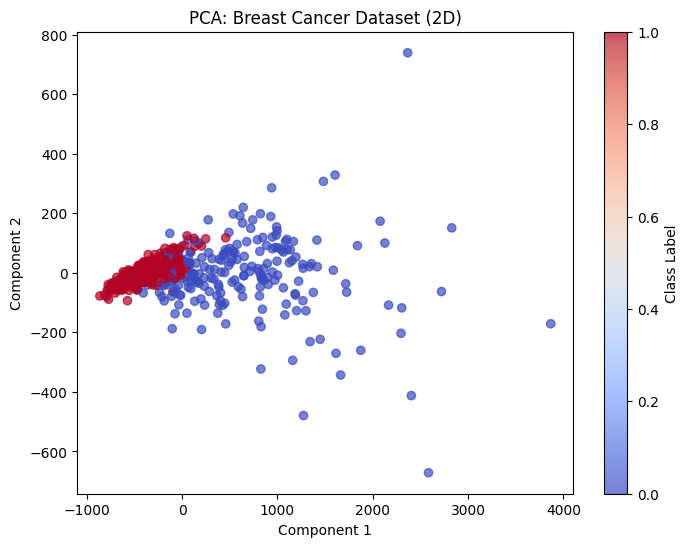

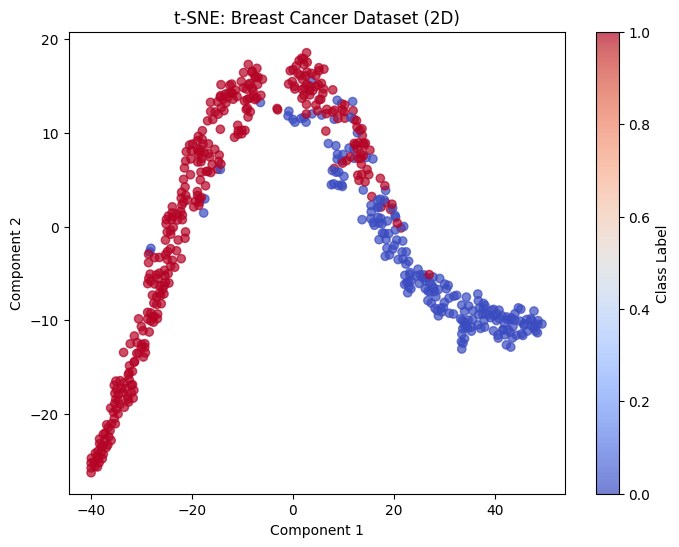

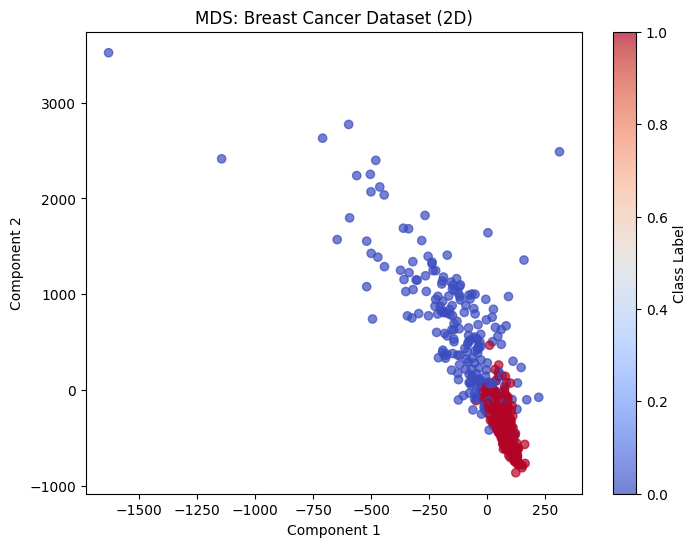

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (30D)
y = data.target  # Labels (0 = Malignant, 1 = Benign)
labels = data.target_names  # ['malignant', 'benign']

# Function to plot results
def plot_2D(X_transformed, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.colorbar(label="Class Label")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# (8.1) PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_2D(X_pca, y, "PCA: Breast Cancer Dataset (2D)")

# (8.2) t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_2D(X_tsne, y, "t-SNE: Breast Cancer Dataset (2D)")

# (8.3) MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
plot_2D(X_mds, y, "MDS: Breast Cancer Dataset (2D)")


# Clustering on Synthetic Data

We generate synthetic 2D datasets and apply clustering methods:

KMeans (with different k values)

Agglomerative Clustering (with ward, complete, average, and single linkages)

DBSCAN (with different eps and min_samples values)

Each clustering method is visualized to understand how they separate data.

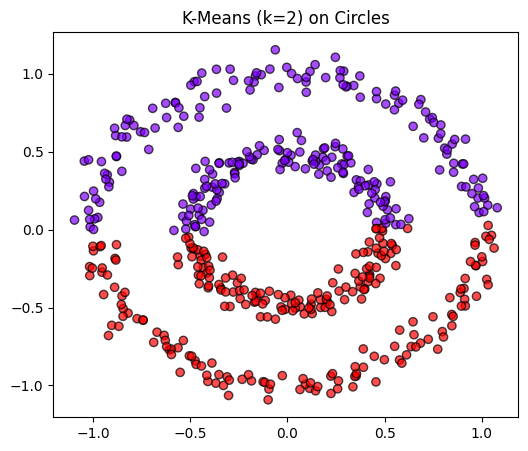

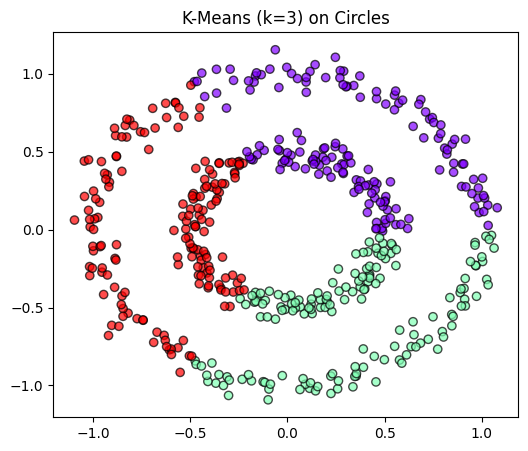

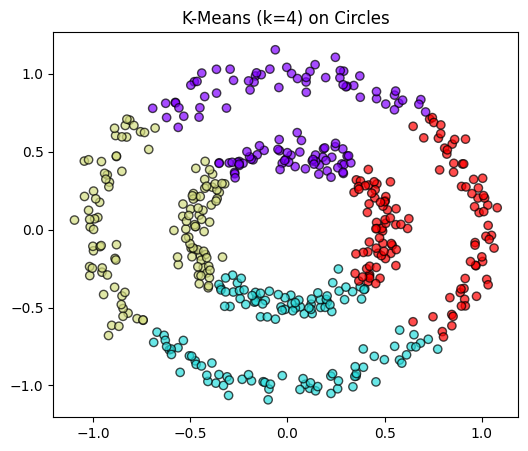

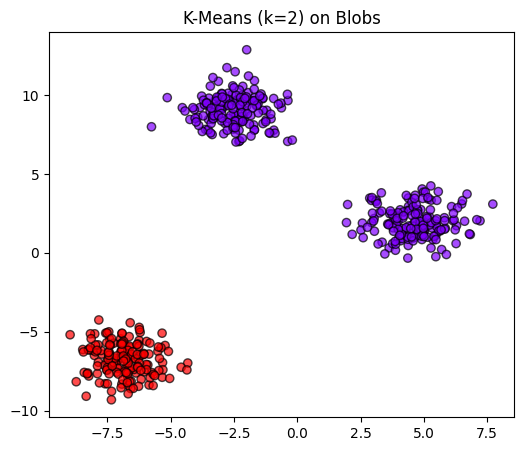

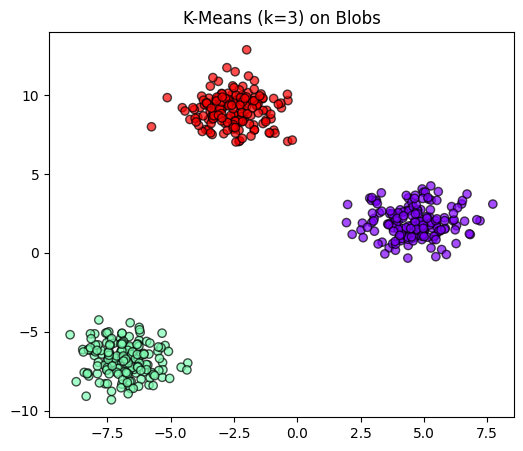

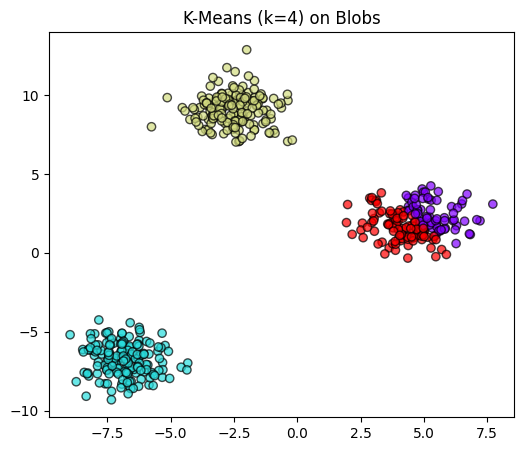

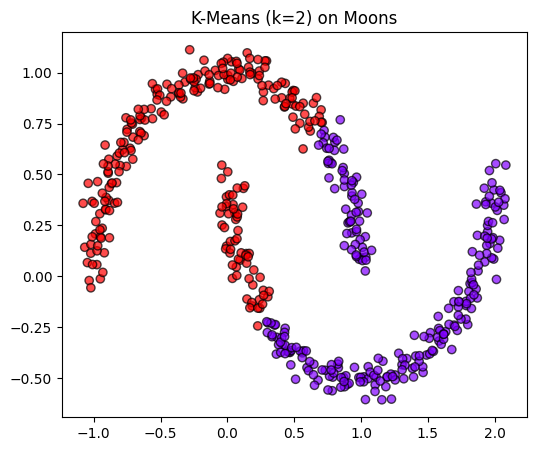

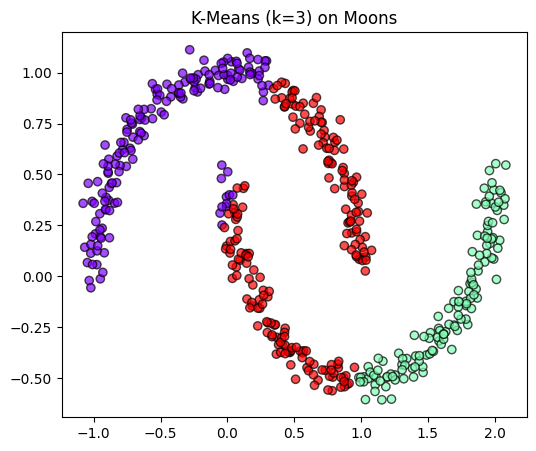

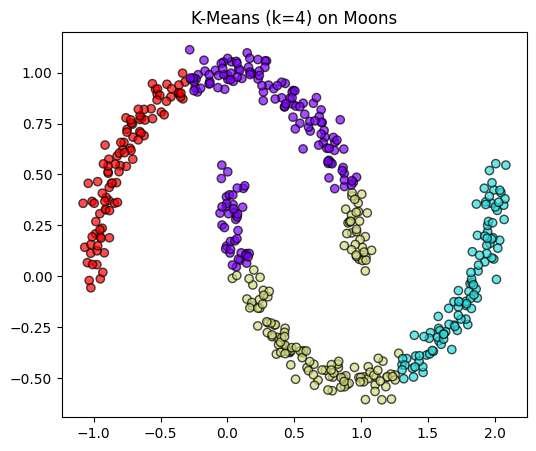

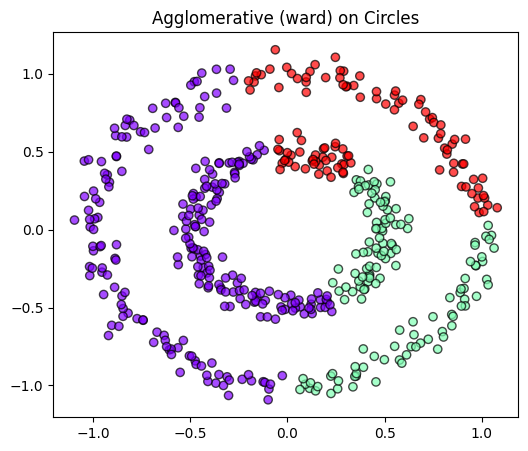

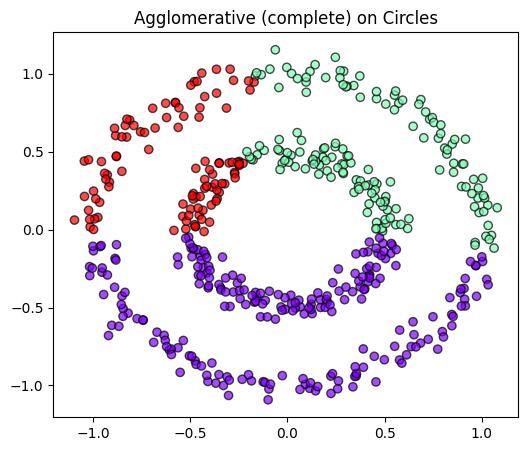

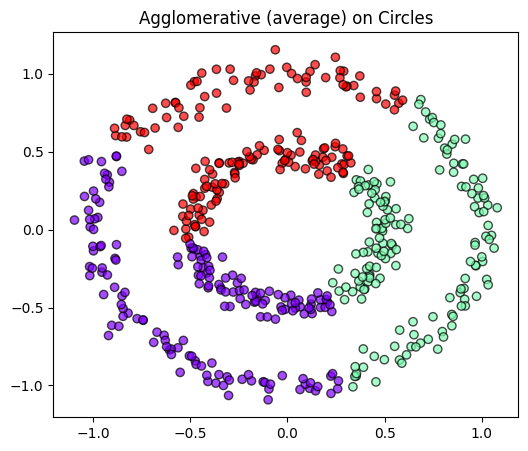

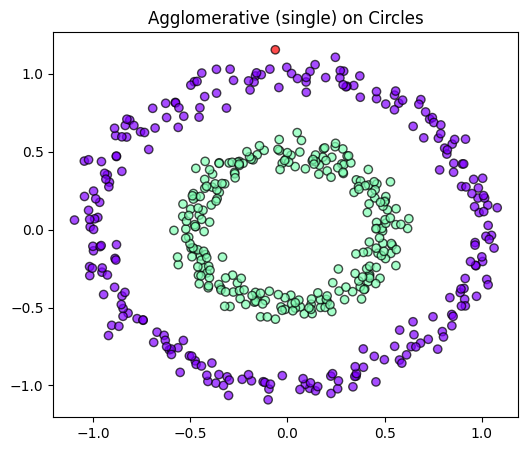

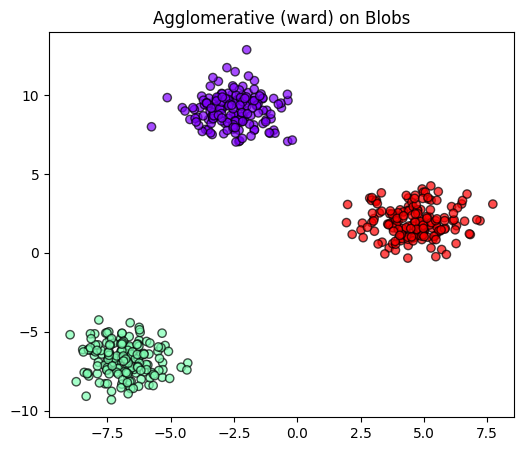

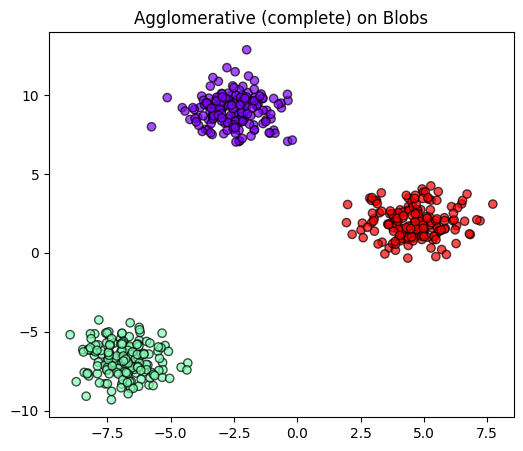

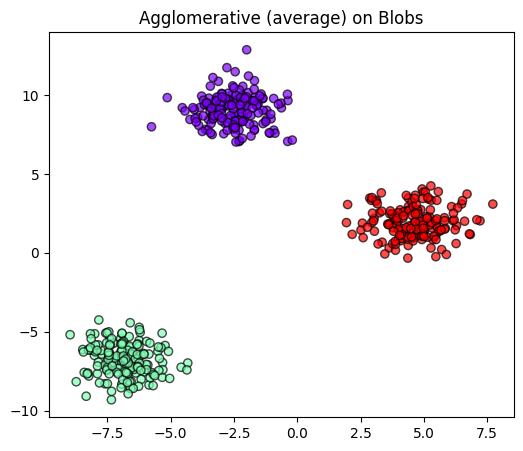

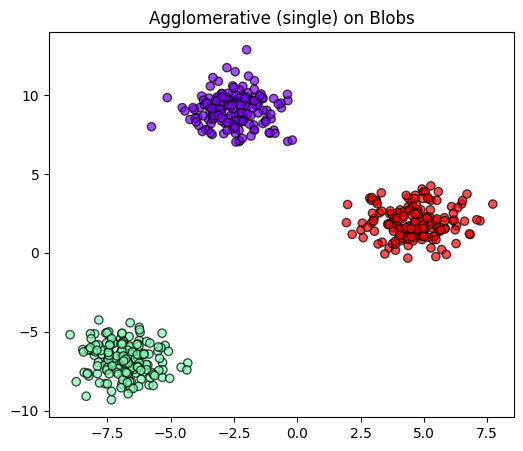

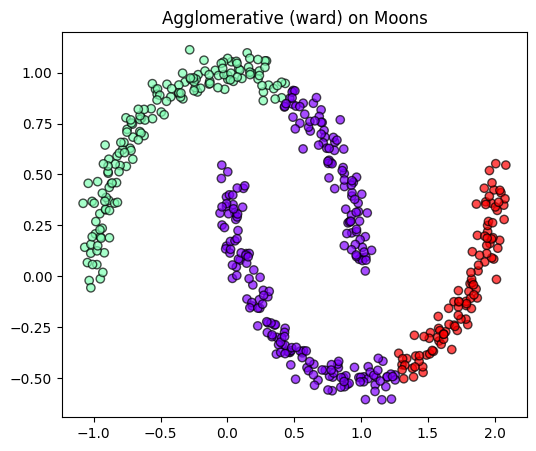

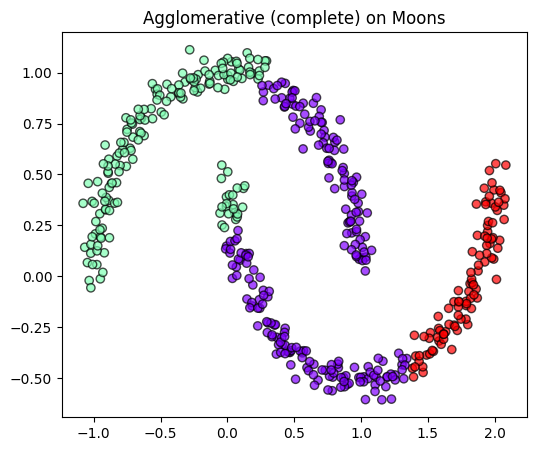

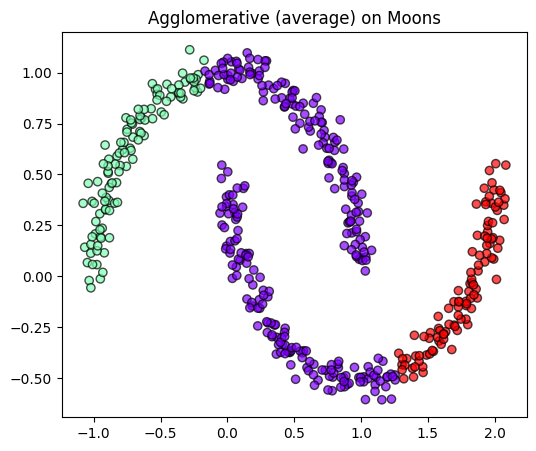

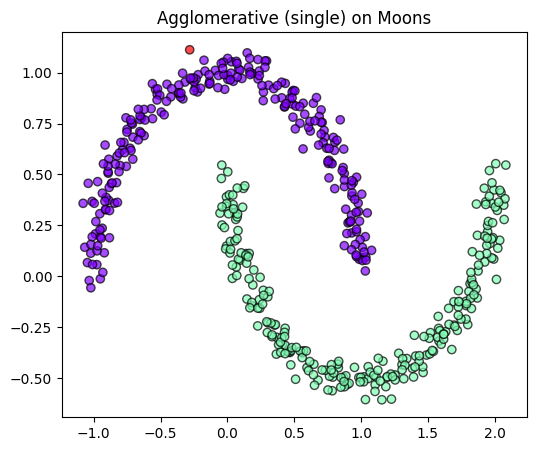

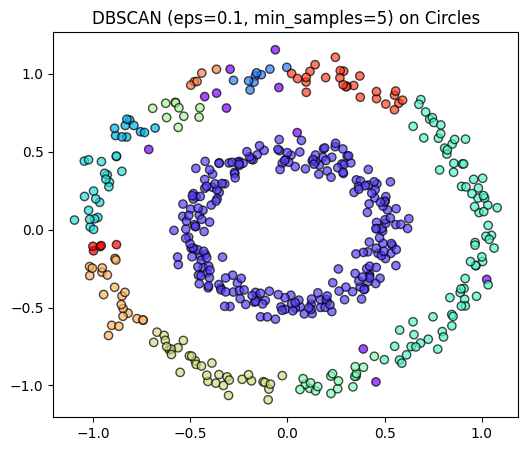

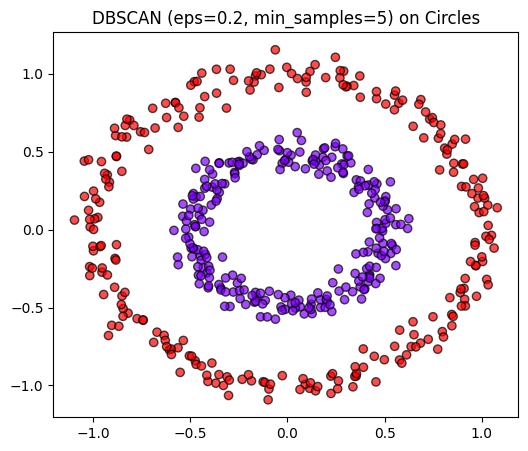

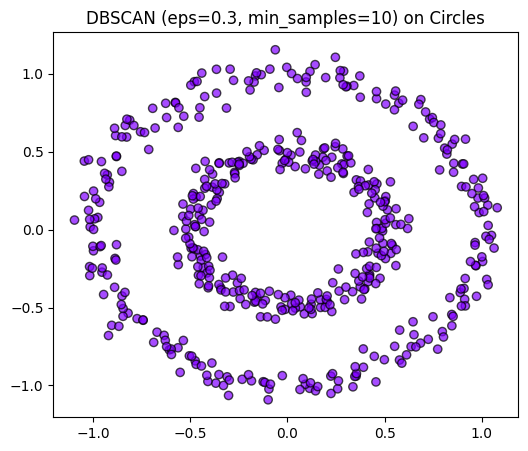

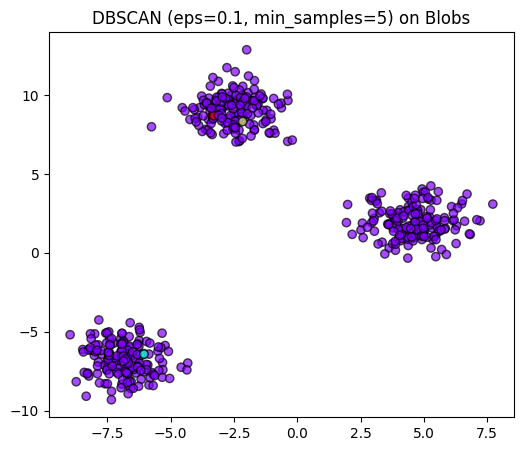

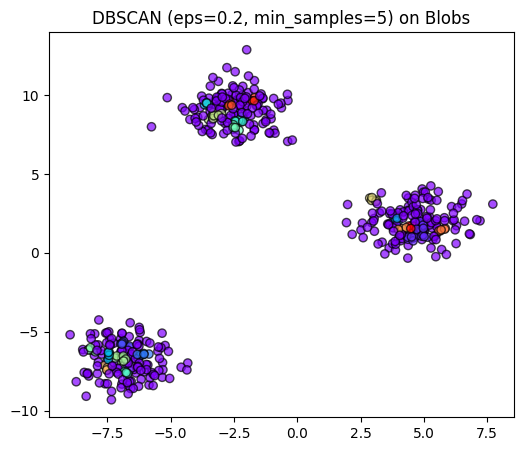

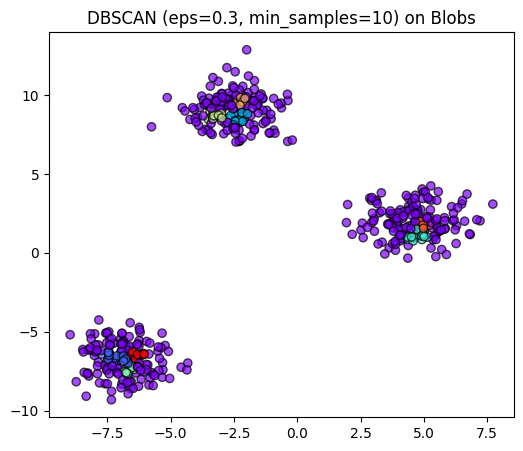

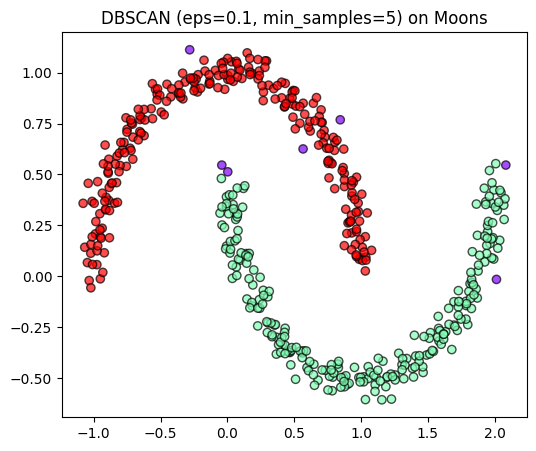

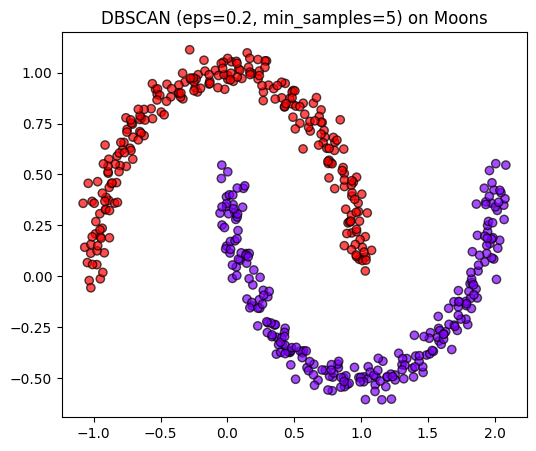

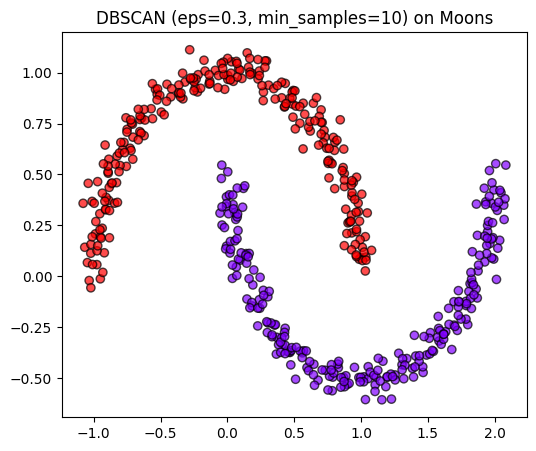

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import os

# Create a folder for images
output_dir = "clustering_results"
os.makedirs(output_dir, exist_ok=True)

# Function to generate and plot clustering results
def plot_clusters(X, labels, title, filename):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()

# (9.1) Concentric Circles
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# (9.2) Blobs
X_blobs, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

# (9.3) Moons
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Store datasets
datasets = {
    "Circles": X_circles,
    "Blobs": X_blobs,
    "Moons": X_moons
}

# (9.4) K-Means Clustering with 3 choices of k
k_values = [2, 3, 4]
for name, X in datasets.items():
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        plot_clusters(X, labels, f"K-Means (k={k}) on {name}", f"kmeans_{name}_k{k}.png")

# (9.5) Agglomerative Clustering with different linkage types
linkages = ['ward', 'complete', 'average', 'single']
for name, X in datasets.items():
    for link in linkages:
        agglo = AgglomerativeClustering(n_clusters=3, linkage=link)
        labels = agglo.fit_predict(X)
        plot_clusters(X, labels, f"Agglomerative ({link}) on {name}", f"agglo_{name}_{link}.png")

# (9.6) DBSCAN with different eps and min_samples
dbscan_params = [(0.1, 5), (0.2, 5), (0.3, 10)]
for name, X in datasets.items():
    for eps, min_samples in dbscan_params:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        plot_clusters(X, labels, f"DBSCAN (eps={eps}, min_samples={min_samples}) on {name}",
                      f"dbscan_{name}_eps{eps}_min{min_samples}.png")


# Clustering Metrics

We evaluate clustering results on 2D concentric circles data using:

Homogeneity Score (Each cluster should contain only members of a single class)

Completeness Score (All members of a given class should be assigned to the same cluster)

V-score (Harmonic mean of homogeneity & completeness)

Adjusted Rand Index (ARI) (Measures similarity between predicted and true labels)

Observations help determine which clustering method performs best.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Generate synthetic concentric circles data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# (10.1 - 10.4) Define clustering methods with one parameter choice each
kmeans = KMeans(n_clusters=2, random_state=42)
agglo = AgglomerativeClustering(n_clusters=2, linkage="ward")
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit the models
y_kmeans = kmeans.fit_predict(X)
y_agglo = agglo.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

# Function to compute metrics
def evaluate_clustering(y_pred, model_name):
    homogeneity = homogeneity_score(y_true, y_pred)
    completeness = completeness_score(y_true, y_pred)
    v_score = v_measure_score(y_true, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)

    print(f"\n{model_name} Clustering Results:")
    print(f"Homogeneity Score: {homogeneity:.4f}")
    print(f"Completeness Score: {completeness:.4f}")
    print(f"V-Score: {v_score:.4f}")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Evaluate models
evaluate_clustering(y_kmeans, "K-Means")
evaluate_clustering(y_agglo, "Agglomerative Clustering")
evaluate_clustering(y_dbscan, "DBSCAN")



K-Means Clustering Results:
Homogeneity Score: 0.0000
Completeness Score: 0.0000
V-Score: 0.0000
Adjusted Rand Index (ARI): -0.0020

Agglomerative Clustering Clustering Results:
Homogeneity Score: 0.0056
Completeness Score: 0.0056
V-Score: 0.0056
Adjusted Rand Index (ARI): 0.0058

DBSCAN Clustering Results:
Homogeneity Score: 1.0000
Completeness Score: 1.0000
V-Score: 1.0000
Adjusted Rand Index (ARI): 1.0000


# Pipelines with Transformations

We create a Pipeline for a classification dataset, including:

PCA Transformation (Reduces dimensionality while preserving variance)

Decision Tree Transformation (Uses a Decision Tree to generate new features)

Final Classification Model (Random Forest is used as the classifier)

The pipeline automates preprocessing, transformation, and classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into Train-Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (11.1) PCA Transform (reducing to 10 components)
pca = PCA(n_components=10)

# (11.2) Decision Tree Transform (using leaf nodes as features)
class DecisionTreeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_depth=3):
        self.tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    def fit(self, X, y=None):
        self.tree.fit(X, y)
        return self

    def transform(self, X):
        return self.tree.apply(X).reshape(-1, 1)  # Convert leaf indices to features

# Create the Decision Tree Transformer
dt_transformer = DecisionTreeTransformer(max_depth=3)

# Define the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('pca', pca),                  # Apply PCA transformation
    ('dt_transform', dt_transformer),  # Apply Decision Tree transformation
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Classifier
])

# Train the Pipeline
pipeline.fit(X_train, y_train)

# Predict on Test Set
y_pred = pipeline.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Pipeline Accuracy: {accuracy:.4f}")


Pipeline Accuracy: 0.9561


# Hyperparameter Tuning using Grid Search

We use Grid Search with Cross-Validation (GridSearchCV) to find optimal hyperparameters for:

Decision Tree: max_depth, min_samples_split

Random Forest: n_estimators, max_features

SVC: C, kernel

The best parameters for each classifier are selected based on cross-validation accuracy.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into Train-Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Classifiers and Parameter Grids
param_grids = {
    "DecisionTree": {
        "classifier": [DecisionTreeClassifier(random_state=42)],
        "classifier__max_depth": [3, 5, 10, None],
        "classifier__min_samples_split": [2, 5, 10]
    },
    "RandomForest": {
        "classifier": [RandomForestClassifier(random_state=42)],
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_features": ["sqrt", "log2", None]
    },
    "SVC": {
        "classifier": [SVC(random_state=42)],
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"]
    }
}

# Perform Grid Search for each classifier
best_params = {}
for name, params in param_grids.items():
    print(f"\nPerforming Grid Search for {name}...\n")

    # Create a pipeline with standardization and classifier
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Standardize data for SVM
        ("classifier", params["classifier"][0])  # Placeholder classifier
    ])

    # Perform Grid Search
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters
    best_params[name] = grid_search.best_params_

    # Print results
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Print final results
print("\nFinal Best Parameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")



Performing Grid Search for DecisionTree...

Best Parameters for DecisionTree: {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Best CV Accuracy: 0.9385

Performing Grid Search for RandomForest...

Best Parameters for RandomForest: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
Best CV Accuracy: 0.9582

Performing Grid Search for SVC...

Best Parameters for SVC: {'classifier': SVC(random_state=42), 'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best CV Accuracy: 0.9780

Final Best Parameters:
DecisionTree: {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
RandomForest: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
SVC: {'classifier': SVC(random_state=42), 'classifier__C': 0.1, 'classifi